#---------------Exploratory Data Analysis (EDA)---------------#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
products = pd.read_csv("../data/cleaned/products.csv")
inventory = pd.read_csv("../data/cleaned/inventory.csv")
orders = pd.read_csv("../data/cleaned/orders.csv")
forecast = pd.read_csv("../data/cleaned/demand_forecast.csv")

In [5]:
inventory["date"] = pd.to_datetime(inventory["date"])
orders["order_date"] = pd.to_datetime(orders["order_date"])
orders["delivery_date"] = pd.to_datetime(orders["delivery_date"])


#EDA Question 1: Where are STOCKOUTS happening?

In [9]:
#Which products and warehouses frequently run out of stock?

#Identify stockouts
stockouts = inventory[inventory["stock_level"] == 0]
stockouts.head()

,date,product_id,warehouse,stock_level
36,2024-01-03,P003,Bangalore,0.0
247,2024-01-17,P003,Mumbai,0.0
297,2024-01-20,P005,Bangalore,0.0
315,2024-01-22,P001,Bangalore,0.0
318,2024-01-22,P002,Bangalore,0.0


In [11]:
#Stockout by product
stockout_by_product = (
    stockouts.groupby("product_id")
    .size()
    .reset_index(name="stockout_days")
)
stockout_by_product

,product_id,stockout_days
0,P001,1
1,P002,1
2,P003,2
3,P005,1


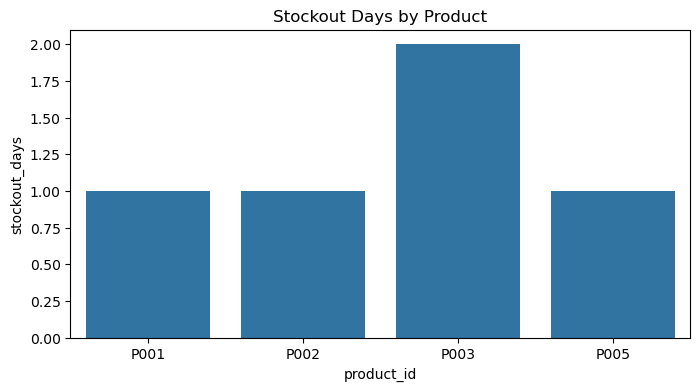

In [13]:
#Visualize stockouts
plt.figure(figsize=(8,4))
sns.barplot(
    data=stockout_by_product,
    x="product_id",
    y="stockout_days"
)
plt.title("Stockout Days by Product")
plt.show()

📌Insight: Product P003 experiences the highest number of stockout days, indicating supply-demand mismatch.

#EDA Question 2: Which warehouses are risky?

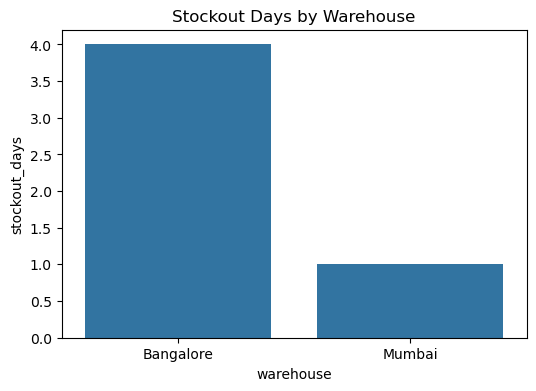

In [14]:
#Which warehouses contribute most to stockouts?

stockout_by_warehouse = (
    stockouts.groupby("warehouse")
    .size()
    .reset_index(name="stockout_days")
)

#Visualize stockouts
plt.figure(figsize=(6,4))
sns.barplot(
    data=stockout_by_warehouse,
    x="warehouse",
    y="stockout_days"
)
plt.title("Stockout Days by Warehouse")
plt.show()


📌Insight: Bangalore warehouse shows higher stockout frequency compared to others.

#EDA Question 3: Are we OVERSTOCKING?

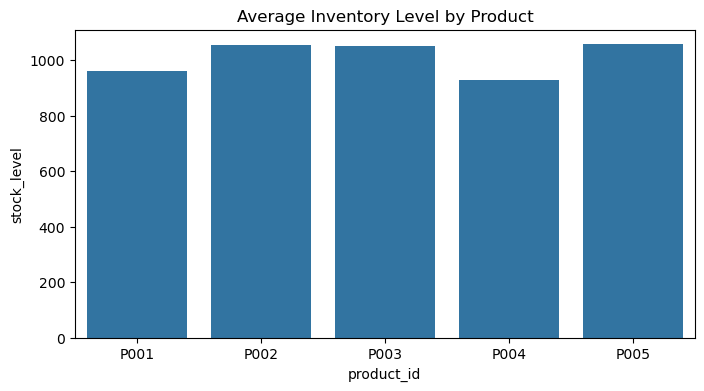

In [16]:
#Which products consistently have very high inventory?

#Average Inventory by Product
avg_inventory = (
    inventory.groupby("product_id")["stock_level"]
    .mean()
    .reset_index()
)

#Visualize inventory by product
plt.figure(figsize=(8,4))
sns.barplot(
    data=avg_inventory,
    x="product_id",
    y="stock_level"
)
plt.title("Average Inventory Level by Product")
plt.show()

📌Insight: Product P005 shows consistently high inventory, indicating possible overstocking.

#EDA Question 4: How BAD is demand forecasting?

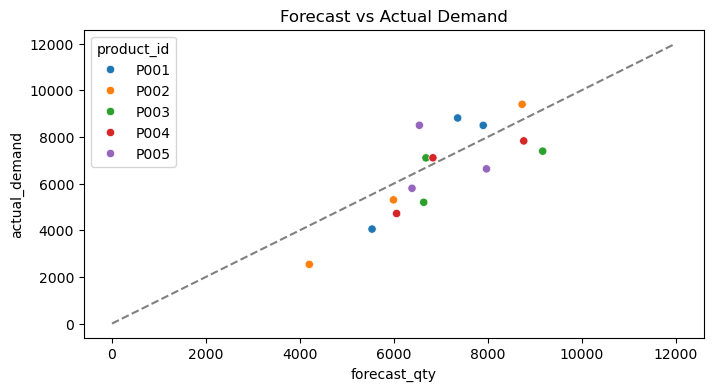

In [17]:
#How far is forecasted demand from actual demand?

#Forcast Error
forecast["forecast_error"] = (
    forecast["actual_demand"] - forecast["forecast_qty"]
)

#Visualize Forecast vs Actual
plt.figure(figsize=(8,4))
sns.scatterplot(
    data=forecast,
    x="forecast_qty",
    y="actual_demand",
    hue="product_id"
)
plt.plot([0,12000], [0,12000], "--", color="gray")
plt.title("Forecast vs Actual Demand")
plt.show()


📌Insight: Significant deviation from the ideal line indicates poor forecast accuracy for some products.

#EDA Question 5: Are deliveries LATE?

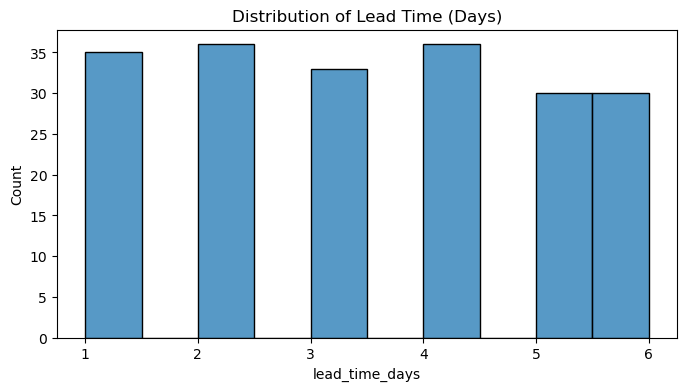

In [18]:
#What does lead time look like?

#Lead Time Distribution
plt.figure(figsize=(8,4))
sns.histplot(orders["lead_time_days"], bins=10)
plt.title("Distribution of Lead Time (Days)")
plt.show()


📌Insight: Most deliveries take 2–5 days, but some orders exceed expected lead time.

#EDA Question 6: Which products cause delivery delays?

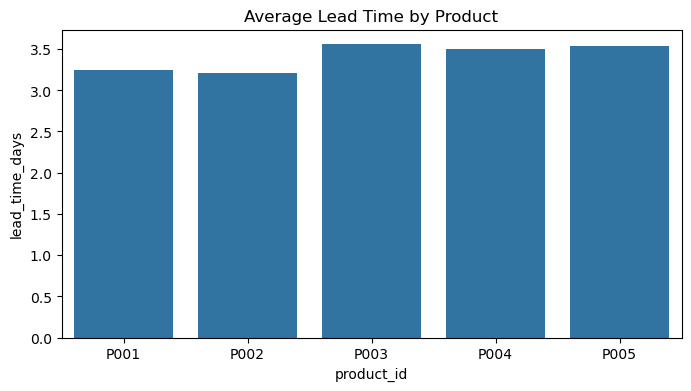

In [19]:
avg_lead_time_product = (
    orders.groupby("product_id")["lead_time_days"]
    .mean()
    .reset_index()
)

#Visualize delays
plt.figure(figsize=(8,4))
sns.barplot(
    data=avg_lead_time_product,
    x="product_id",
    y="lead_time_days"
)
plt.title("Average Lead Time by Product")
plt.show()

📌Insight: Product P003 has the highest average lead time, indicating logistics inefficiency.

#Combining Tables for Deeper Insights

In [20]:
#Merging Orders and Products tables
orders_products = orders.merge(products, on="product_id", how="left")

In [21]:
orders_products

,order_id,product_id,order_date,quantity,delivery_date,lead_time_days,product_name,category,cost_price,selling_price
0,1001,P002,2024-01-03,222,2024-01-07,4,GoodDay Biscuits,Food,8,12
1,1002,P001,2024-01-20,183,2024-01-25,5,Lux Soap,Personal Care,18,25
2,1003,P001,2024-01-22,473,2024-01-26,4,Lux Soap,Personal Care,18,25
3,1004,P002,2024-01-16,121,2024-01-22,6,GoodDay Biscuits,Food,8,12
4,1005,P001,2024-01-25,312,2024-01-26,1,Lux Soap,Personal Care,18,25
...,...,...,...,...,...,...,...,...,...,...
195,1196,P003,2024-01-27,336,2024-01-29,2,Colgate Toothpaste,Oral Care,40,55
196,1197,P004,2024-01-09,452,2024-01-13,4,Sunsilk Shampoo,Personal Care,90,120
197,1198,P002,2024-01-05,373,2024-01-07,2,GoodDay Biscuits,Food,8,12
198,1199,P002,2024-01-17,493,2024-01-18,1,GoodDay Biscuits,Food,8,12
